# Calculation of snow cover for each model

## Objective

The objective here is to extract the snow variables from the interpolated files and calculate the average monthly snow area over the entire reference period (1995-2014). These values ​​must then be extracted for further analysis. A quick visualization of the snow area in map form will also be carried out to quickly see if certain models appear to be poorly simulating snow visually.

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-07-08T13:42:04.193935+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-58-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import sys
import os

# Chemin absolu vers le dossier codes_ORL_evaluation
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ajout du chemin au sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Projet root ajouté au path:", project_root)

Projet root ajouté au path: /home/jovyan/M2_Internship_Laurie_Vayssettes


In [3]:
from module import *

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [4]:
%watermark --iversions

matplotlib: 3.10.0
numpy     : 2.0.2
pandas    : 2.2.3
watermark : 2.5.0
skimage   : 0.25.0
csv       : 1.0
cartopy   : 0.24.0
sys       : 3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:24:40) [GCC 13.3.0]
cdo       : 1.6.1
seaborn   : 0.13.2
xarray    : 2025.1.1
xesmf     : 0.8.8
netCDF4   : 1.7.2



### Creating a list with all historical files

In [8]:
#files = os.listdir("/home/jovyan/private-storage/interp_models_hist_bis/")
files = os.listdir("/home/jovyan/shared-storage/Data_LaurieV/output_data2/snow_hist/")

nc_files = [filename for filename in files if filename.endswith(".nc")]
nc_files

['BCC-CSM2-MR_hist_reprojete.nc',
 'CanESM5_hist_reprojete.nc',
 'CanESM5-CanOE_hist_reprojete.nc',
 'CESM2_hist_reprojete.nc',
 'CESM2-WACCM_hist_reprojete.nc',
 'CIESM_hist_reprojete.nc',
 'CNRM-CM6-1_hist_reprojete.nc',
 'CNRM-CM6-1-HR_hist_reprojete.nc',
 'CNRM-ESM2-1_hist_reprojete.nc',
 'EC-Earth3_hist_reprojete.nc',
 'EC-Earth3-Veg_hist_reprojete.nc',
 'FGOALS-f3-L_hist_reprojete.nc',
 'FGOALS-g3_hist_reprojete.nc',
 'GFDL-CM4_hist_reprojete.nc',
 'GISS-E2-1-G_hist_reprojete.nc',
 'HadGEM3-GC31-LL_hist_reprojete.nc',
 'MIROC-ES2L_hist_reprojete.nc',
 'MIROC6_hist_reprojete.nc',
 'MPI-ESM1-2-HR_hist_reprojete.nc',
 'MPI-ESM1-2-LR_hist_reprojete.nc',
 'MRI-ESM2-0_hist_reprojete.nc',
 'NorESM2-LM_hist_reprojete.nc',
 'NorESM2-MM_hist_reprojete.nc',
 'UKESM1-0-LL_hist_reprojete.nc',
 'IPSL-CM6A-LR_hist_reprojete.nc']

### Displaying snow cover maps and creating a dictionary with numerical area values

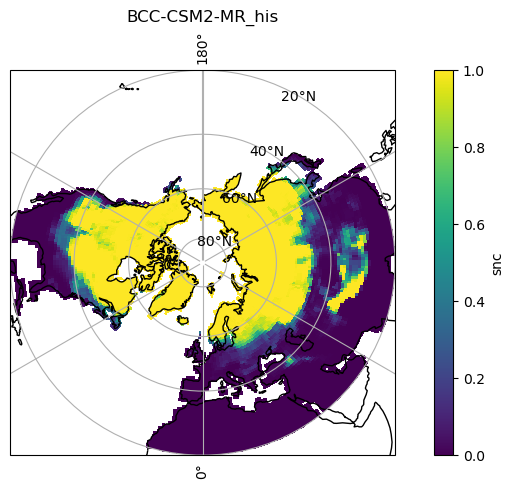

La variable 'snc' est en %. Conversion en fraction.


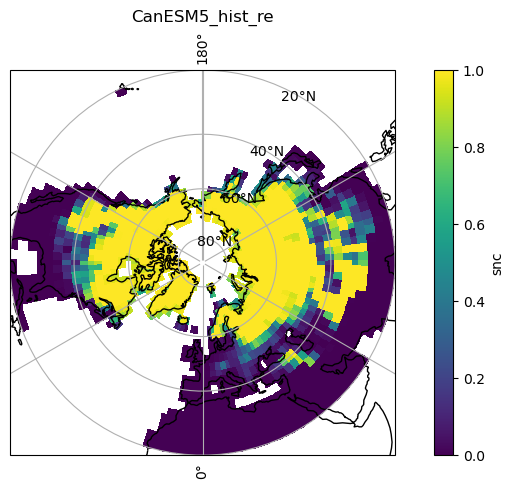

La variable 'snc' est en %. Conversion en fraction.


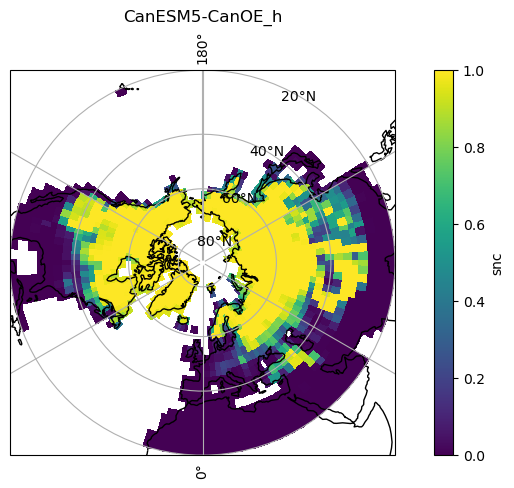

La variable 'snc' est en %. Conversion en fraction.


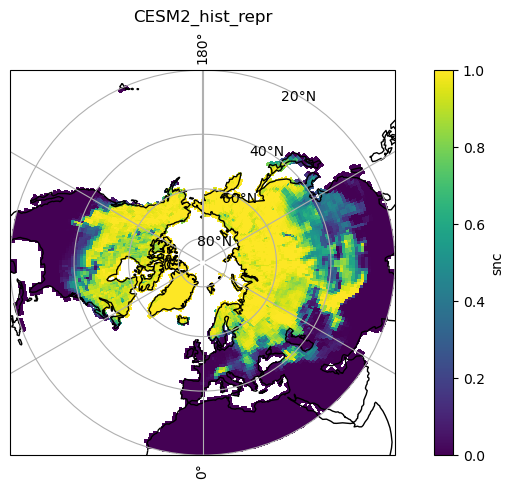

La variable 'snc' est en %. Conversion en fraction.


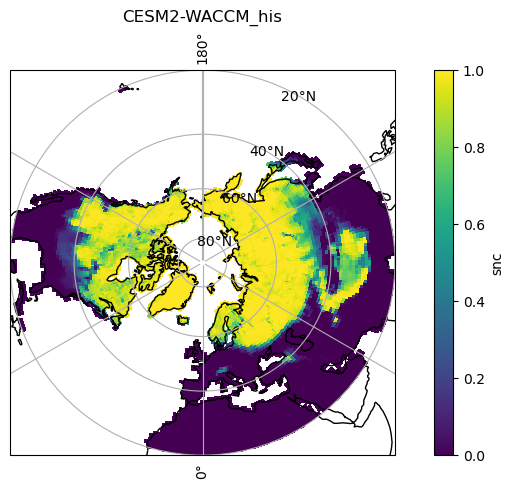

La variable 'snc' est en %. Conversion en fraction.


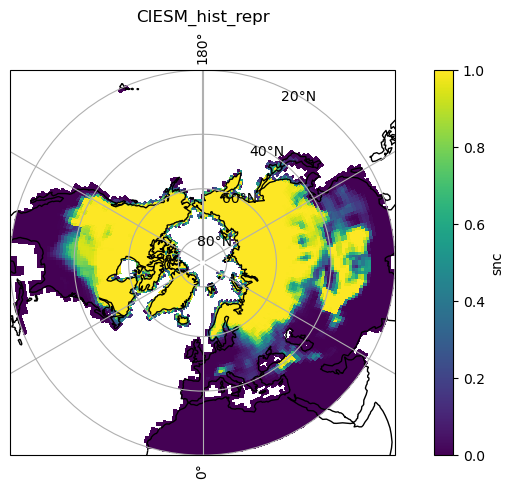

La variable 'snc' est en %. Conversion en fraction.


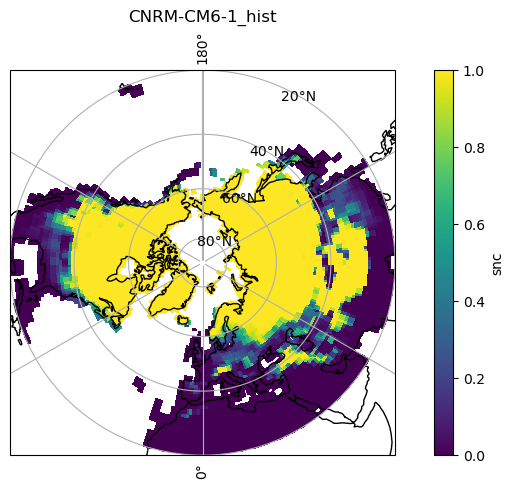

La variable 'snc' est en %. Conversion en fraction.


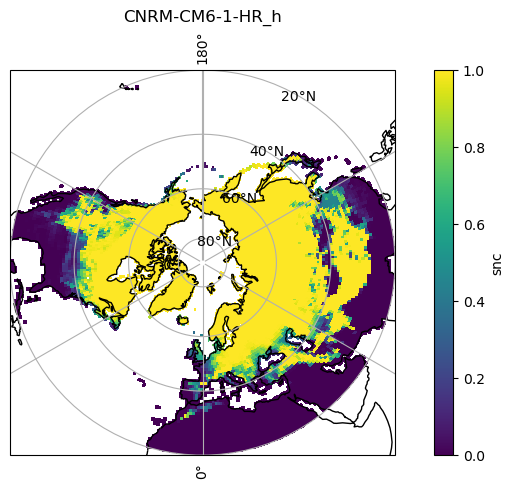

La variable 'snc' est en %. Conversion en fraction.


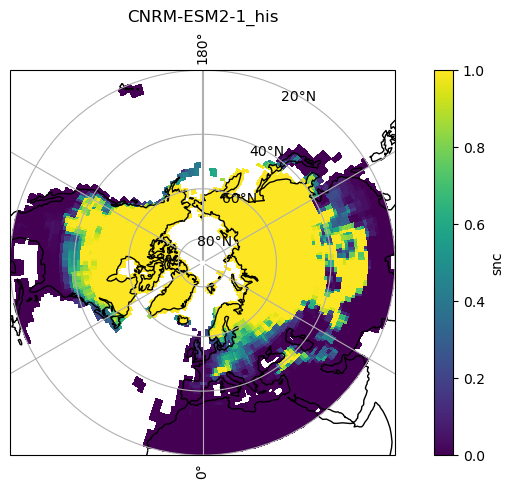

La variable 'snc' est en %. Conversion en fraction.


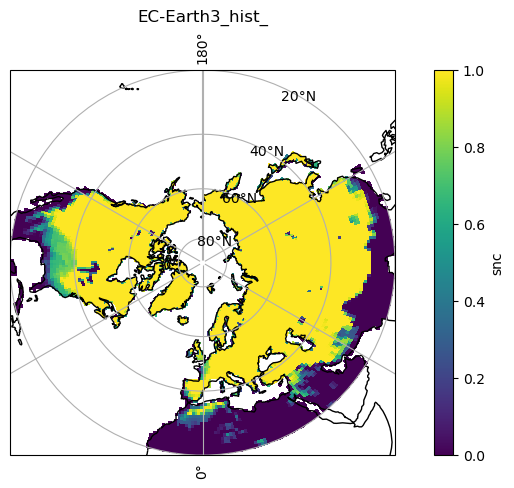

La variable 'snc' est en %. Conversion en fraction.


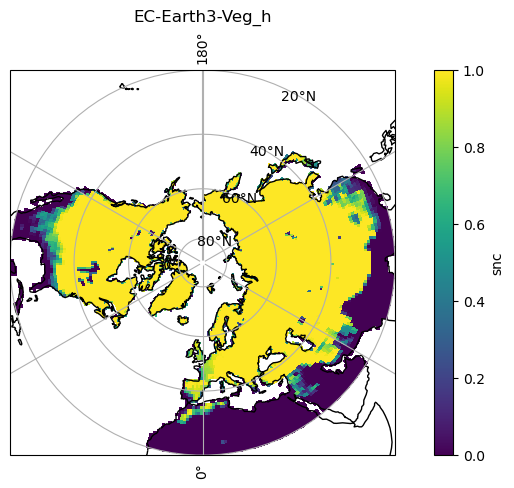

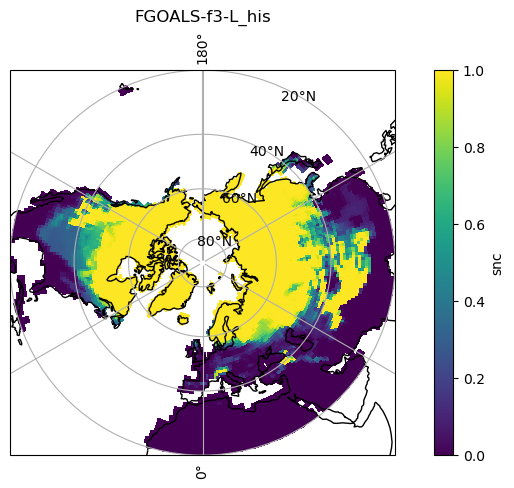

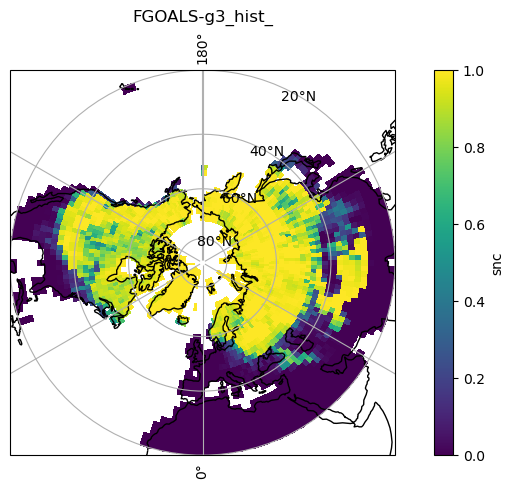

La variable 'snc' est en %. Conversion en fraction.


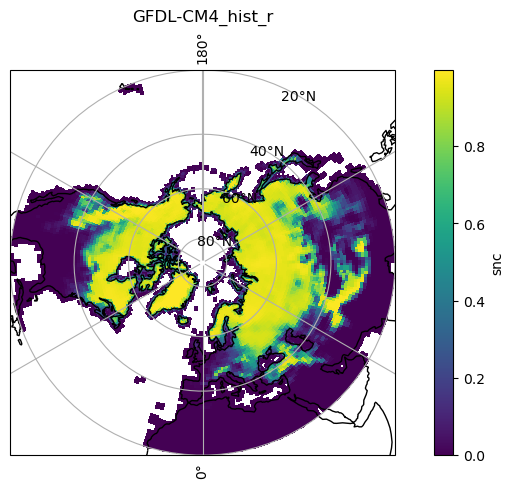

La variable 'snc' est en %. Conversion en fraction.


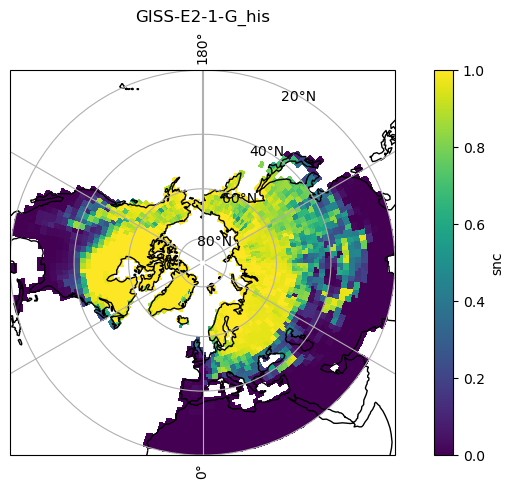

La variable 'snc' est en %. Conversion en fraction.


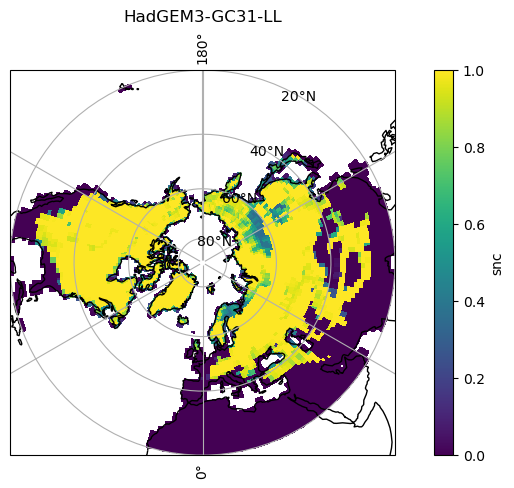

La variable 'snc' est en %. Conversion en fraction.


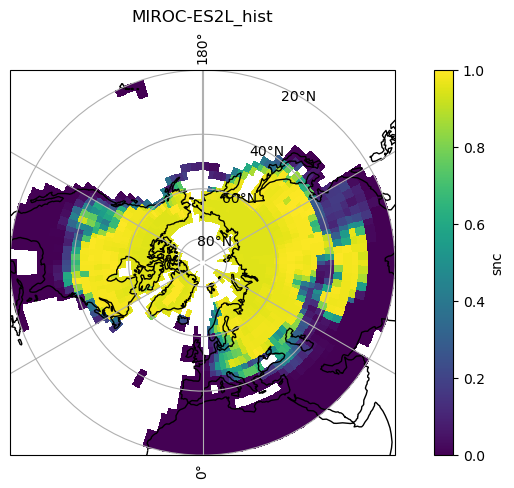

La variable 'snc' est en %. Conversion en fraction.


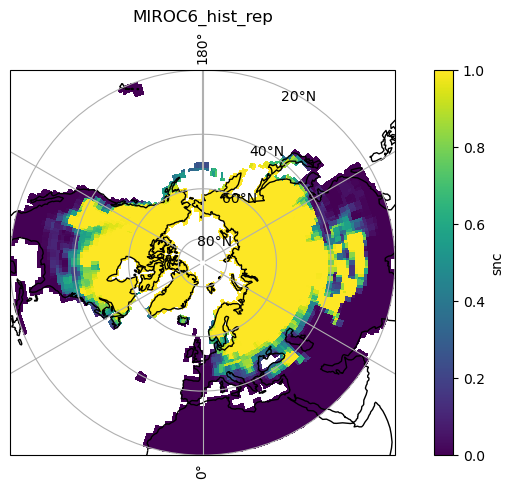

La variable 'snc' est en %. Conversion en fraction.


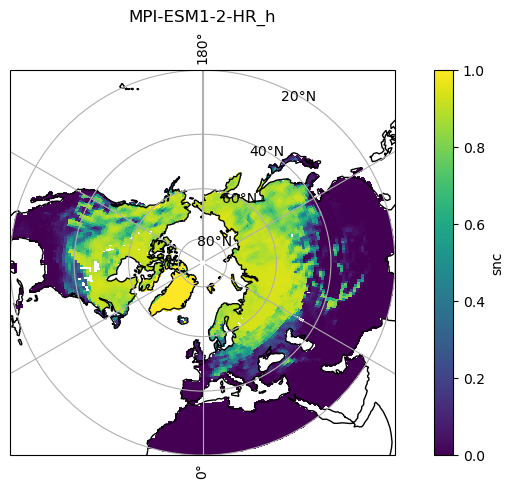

La variable 'snc' est en %. Conversion en fraction.


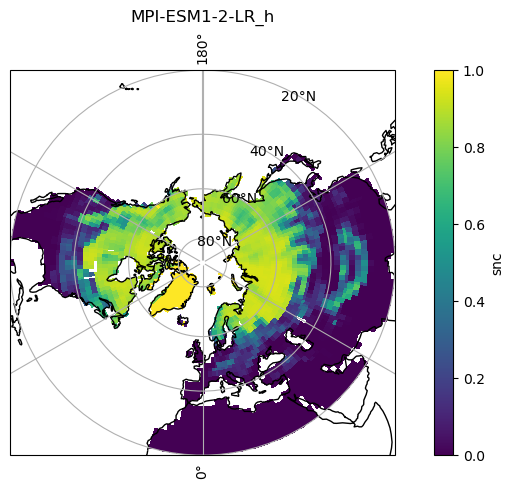

La variable 'snc' est en %. Conversion en fraction.


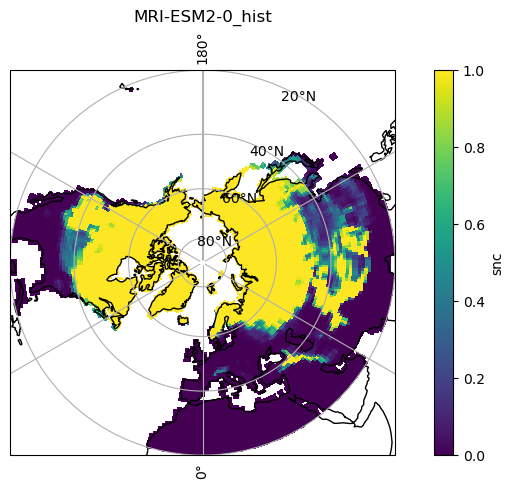

La variable 'snc' est en %. Conversion en fraction.


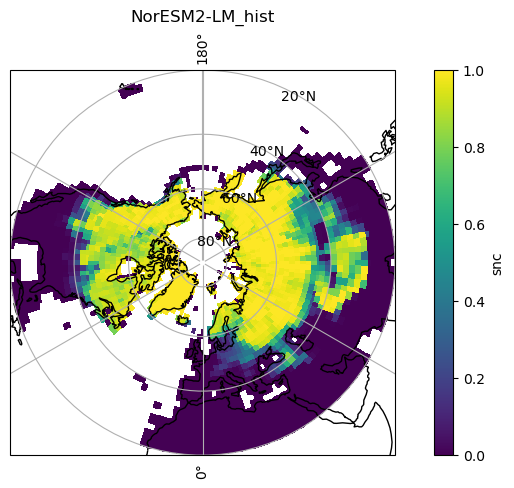

La variable 'snc' est en %. Conversion en fraction.


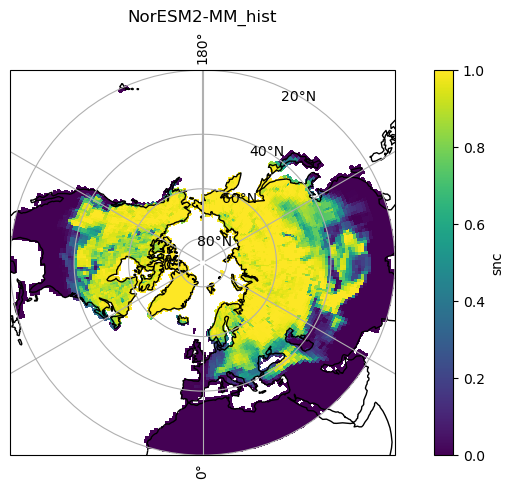

La variable 'snc' est en %. Conversion en fraction.


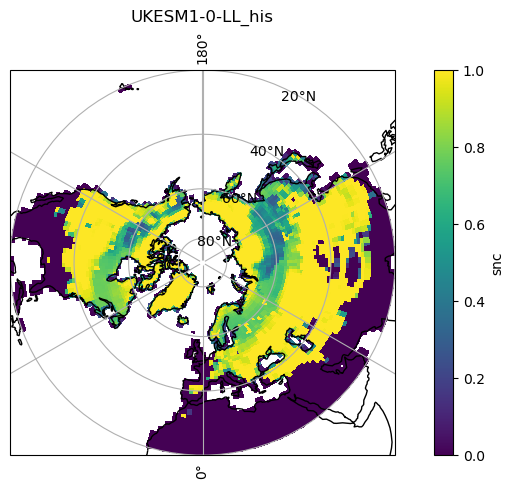

La variable 'snc' est en %. Conversion en fraction.


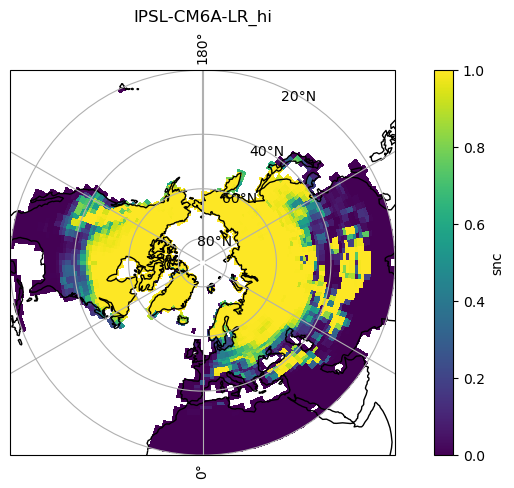

In [9]:
snow_cover_dict = {}

for i, files in enumerate(nc_files):
    model_name = files.split("_")[0]
    
    path_snc = os.path.join("/home/jovyan/shared-storage/Data_LaurieV/output_data2/snow_hist/", files)
    path_areacella = os.path.join("/home/jovyan/shared-storage/Data_LaurieV/output_data2/areacella_recalcule", files.replace("hist_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/shared-storage/Data_LaurieV/output_data2/sftlf/", files.replace("hist", "sftlf"))
                                 
    # use of functions defined in the module
    ds_snc, ds_area, ds_sftlf = get_data(path_snc, path_areacella, path_sftlf)
    snc, snow_cover, monthly_mean = extraction_variable_and_monthly_mean(ds_snc, sftlf=ds_sftlf["sftlf"])
    areacella = ds_area["cell_area"]
    snow_cover_km2 = snow_surface_calculation(snow_cover, areacella)
    snow_cover_dict[model_name] = snow_cover_km2

    plot_snow_cover_basic(snc, title=files[:15])
    
    ds_snc.close()
    ds_area.close()

These figures extract the snow cover fraction for a given day, simulated by each model.

In [10]:
# display dictionary with snow area values (in km2)
print(snow_cover_dict)

{'BCC-CSM2-MR': <xarray.DataArray (month: 12)> Size: 96B
array([44373746.08872143, 44552932.09814849, 41193897.37125953,
       33091211.296027  , 21241930.16713201,  9921410.96353975,
        5103984.16062283,  4124142.90262804,  5976217.31481302,
       16158221.92262049, 28392274.14817702, 39030064.97171247])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12, 'CanESM5': <xarray.DataArray (month: 12)> Size: 96B
array([49815466.45001311, 50758678.59106115, 46597043.11899264,
       36731964.36119152, 22770912.65681984,  9093042.38702341,
        3651710.36271254,  3057670.2643934 ,  5027468.72871774,
       16604505.25795256, 32498867.26513574, 43620056.11728722])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    type     |S4 4B ..., 'CanESM5-CanOE': <xarray.DataArray (month: 12)> Size: 96B
array([49990349.82699886, 50843552.39589896, 47003030.61919905,
       37497242.40228686, 23216673.67991479,  9372790.65844469,
        3762654.6576590

Ce dictionnaire affiche toutes les valeurs de superficie neigeuse pour chaque modèle et chaque mois.

In [11]:
# save the dictionary as a csv file
dictionnaire_to_csv(snow_cover_dict, "/home/jovyan/shared-storage/Data_LaurieV/output_data2/snow_cover_per_model.csv")

✅ Fichier CSV sauvegardé : /home/jovyan/shared-storage/Data_LaurieV/output_data/snow_cover_per_model.csv


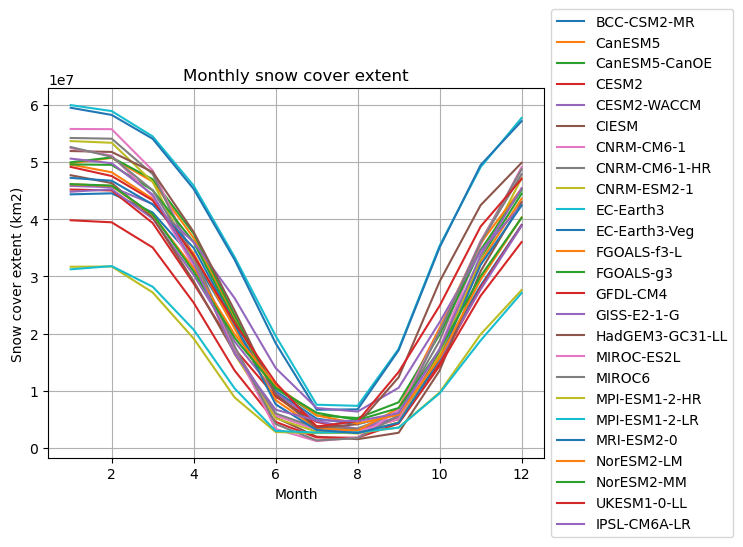

In [17]:
# plot the snow cover extent for all the models
for model, values in snow_cover_dict.items():
    values.plot(label=model)

plt.title("Monthly snow cover extent")
plt.xlabel("Month")
plt.ylabel("Snow cover extent (km2)")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

This figure only shows the snow cover for each month and model. It is already noticeable that some models are slightly excluded from the average by overestimating or underestimating the amount of snow (EC-Earth and MPI).

## Conclusion

This notebook therefore presented the snow cover fraction for each model in the form of a map and made it possible to calculate the average monthly surface area in km2 during the reference period and to extract these values in the form of a csv file.